In [3]:
import tensorflow as tf
import cv2 
import os 
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

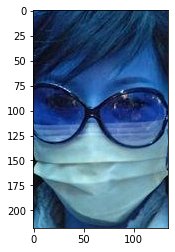

In [4]:
img_array = cv2.imread("data/with_mask/with_mask_10.jpg")
plt.imshow(img_array) 
# We get an image with not original colour 

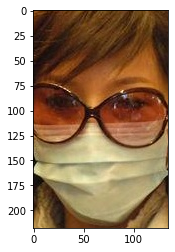

In [5]:
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
# To get the original coloured image 

In [6]:
img_array.shape # 3 means it contains 3 channels RGB

(218, 135, 3)

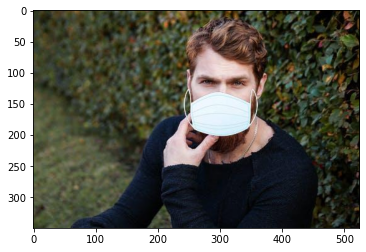

In [7]:
Datadirectory = "data/" ## training dataset
Classes = ["with_mask","without_mask"] ## list of classes 
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

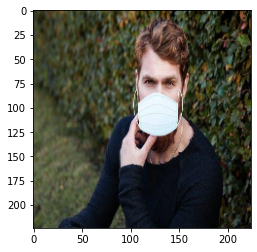

In [8]:
img_size=224 #ImageNet needs to be 224 x 224

new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

## Reading the images and converting all of them to array

In [9]:
training_data= []

def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ## 0 1, labels
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [10]:
create_training_data()

In [11]:
print(len(training_data))

7553


3725 with mask and 3828 without mask adding up to 7553

In [12]:
import random

random.shuffle(training_data)

In [13]:
X = [] ## Data
y = [] ## Labels

for features,label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,img_size,img_size,3) # size, 224 x 224, 3 channels

In [14]:
X.shape

(7553, 224, 224, 3)

In [15]:
# Normalize the data 
X = X/255.0; 

In [17]:
y[100]

1

In [18]:
Y = np.array(y)

In [ ]:
import pickle 

pickle_out = open("X.pickle", "wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [19]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 

In [20]:
y[100]

1

In [21]:
model = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 2s 0us/step


In [22]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

### Transfer Leaning- Tuning, Weights from the last check point 

In [26]:
base_input = model.layers[0].input

In [27]:
base_output = model.layers[-4].output

In [29]:
flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_output= layers.Activation('sigmoid')(final_output)

In [30]:
new_model = keras.Model(inputs=base_input,outputs=final_output)

In [31]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

## Setting binary classifcation (With or without face mask)

In [32]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [36]:
new_model.fit(X,Y,epochs=1, validation_split=0.1)

213/213 [==============================] - 3077s 13s/step - loss: 0.0167 - accuracy: 0.9946 - val_loss: 0.0233 - val_accuracy: 0.9947


In [37]:
new_model.save("my_model3.h5")

In [38]:
new_model = tf.keras.models.load_model("my_model3.h5")

### Checking the predictions 

In [54]:
frame = cv2.imread("data/with_mask/with_mask_100.jpg")

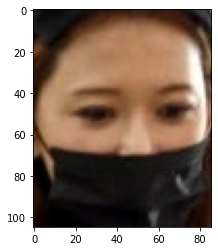

In [55]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [56]:
final_image = cv2.resize(frame, (224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0

In [57]:
predictions= new_model.predict(final_image)

In [61]:
predictions

array([[8.673512e-07]], dtype=float32)

In [ ]:
import winsound
frequency = 2500
duration = 3000


import cv2     # pip install opencv-python
               # pip install opencv-contrib-python     for full package
               # from deepface import DeepFace        pip install deepface
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# set the rectangle background to white
rectangle_bgr = (255, 255, 255)

# make a black image
img = np.zeros((500,500))

# set some text
text = "Some text in a box"

# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]

# set teh text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25

# make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height -2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)

cap = cv2.VideoCapture(-1)
# Check if the webcam is opend correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("No Face Detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex: ex+ew]    # cropping the face
    
    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image, axis=0) # need fourth dimension
    final_image = final_image/255.0
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    Predictions = new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if (predictions>0):
        status = "No Mask"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        
        # Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))
        winsound.Beep(frequency,duration)
    else:
        status = "Face Mask"
        
        x1, y1, w1, h1 = 0, 0, 175, 75
        # Draw black background rectangle
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        
         # Add text
        cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100,150), font, 3, (0,255,0), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0))
    
    # Draw rectangle around the faces
    # for (x,y,w,h) in faces:
    #     cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0),2)
    
    # Use puttext() method for inserting text on video
    
    cv2.imshow('Face Mask Detection Tutorial', frame)
    q
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        

cap.release()
cv2.destroyAllWindows()